## Dataset: Crowdedness at the Campus Gym

source: https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import pandas as pd
import numpy as np
from datetime import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('datasets/gym_dataset.csv')

In [3]:
ds.head(3)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17


In [4]:
ds = ds.drop(['date', 'timestamp'], axis=1)

# Converting to one hot made loss much worse
# one_hot_cols = ['day_of_week', 'is_weekend', 'is_holiday', 'is_start_of_semester',
#                 'is_during_semester', 'month', 'hour']
# X_left = pd.get_dummies(ds[one_hot_cols], columns=one_hot_cols).values
# scaler = StandardScaler()
# X_right = ds.temperature.values.reshape(-1, 1)
# X_right = scaler.fit_transform(X_right)
# X_left.shape, X_right.shape
# X = np.concatenate((X_left, X_right), axis=1)

X = ds.values
y = ds.number_people.values
X.shape, y.shape

((62184, 9), (62184,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43528, 9), (18656, 9), (43528,), (18656,))

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [7]:
batch_size= 32
hidden_layer_size = 50
learning_rate = 1e-3
nb_epoch=2

In [8]:
model = Sequential()
model.add(Dense(hidden_layer_size, input_dim=X_train.shape[-1]))
model.add(Dense(1))

optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

model.fit(X_train, y_train, 
          batch_size=batch_size,
          epochs=nb_epoch, validation_data=(X_test, y_test))

Train on 43528 samples, validate on 18656 samples
Epoch 1/2
43528/43528 [==============================] - 2s - loss: 287.3462 - val_loss: 0.0808

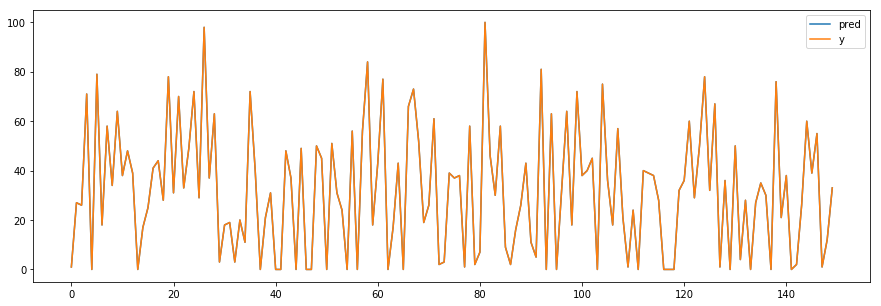

In [9]:
datapoints = 150
plt.figure(figsize=(15, 5))
plt.plot(map(lambda i: int(i[0]), model.predict(X_test[:datapoints, :])))
plt.plot(y_test[:datapoints])
plt.legend(['pred', 'y'])

In [10]:
r2_score(y_test, model.predict(X_test))

0.99986817281795626